In [2]:
import sklearn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import os
import cv2


In [7]:
grape_images = []
labels = [] 
for fruit_dir_path in glob.glob("/Users/revan/Desktop/257/train+val/*"):
    fruit_label = fruit_dir_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
#         image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
        grape_images.append(image)
        labels.append(fruit_label)
grape_images = np.array(grape_images)
grape_images = grape_images.reshape(len(grape_images),-1)
labels = np.array(labels)
print(labels)

['black_measles' 'black_measles' 'black_measles' ... 'leaf_blight'
 'leaf_blight' 'leaf_blight']


In [4]:
print(np.shape(grape_images))
print(grape_images)
labels

(4071, 65536)
[[177 230 221 ... 141 126 152]
 [157 154 146 ... 192 203 210]
 [144 131 132 ... 196 183 168]
 ...
 [126 136 124 ... 206 210 213]
 [144 155 140 ... 202 203 207]
 [ 85  96 105 ... 187 187 187]]


array(['black_measles', 'black_measles', 'black_measles', ...,
       'leaf_blight', 'leaf_blight', 'leaf_blight'], dtype='<U13')

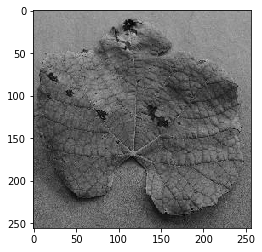

In [5]:
import matplotlib.pyplot as plt
validation_grape_images = []
validation_labels = [] 
for leaf_dir_path in glob.glob("/Users/revan/Desktop/257/test/*"):
    fruit_label = fruit_dir_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
#         image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        #image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        validation_grape_images.append(image)
        validation_labels.append(fruit_label)
validation_grape_images = np.array(validation_grape_images)
plt.imshow(cv2.cvtColor(validation_grape_images[1], cv2.COLOR_GRAY2RGB))
plt.show()
#cv2.imshow(validation_fruit_images[1])
validation_grape_images = validation_grape_images.reshape(len(validation_grape_images),-1)
validation_labels = np.array(validation_labels)

In [27]:
y_train_black_measles= ( labels == 'black_measles') 
y_train_black_rot=(labels == 'black_rot')
y_train_leaf_blight=(labels == 'leaf_blight')
y_train_healthy=(labels == 'healthy')
# y_train_black_measles
y_test_black_measles = (validation_labels == 'black_measles')


In [7]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#clf = svm.SVC(decision_function_shape='ovo')
#clf = svm.SVC()
clf=RandomForestClassifier(max_depth=9, random_state=0,n_estimators=100)
y_score = clf.fit(grape_images,y_train_black_measles)


In [12]:
print(validation_grape_images[9])
print(validation_labels[9])
print(grape_images[9])
print(labels[9])
for i in range(1,298,30):
    check=clf.predict([grape_images[i]])
    if check:
        print("{} == {}".format(check, labels[i]), end=",")

[135 122 144 ... 177 180 182]
black_measles
[177 181 174 ... 138 149 177]
black_measles
[ True] == black_measles,[ True] == black_measles,[ True] == black_measles,[ True] == black_measles,[ True] == black_measles,[ True] == black_measles,[ True] == black_measles,[ True] == black_measles,[ True] == black_measles,[ True] == black_measles,

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(clf, grape_images,y_train_black_measles, cv=3)
confusion_matrix(y_train_black_measles, y_train_pred)
# Remember our sgd_clf is a binary (5 and not-5) classifier. 
# So we get a 2X2 array
# array([[53361,  1218],
#        [ 1497,  3924]])
# ideal confusion matrix has non-zero elements only in the 
# diagonal like this...
# confusion_matrix(y_train_5, y_train_5)
# array([[54579,     0],
#       [    0,  5421]])

array([[2626,  288],
       [ 509,  648]], dtype=int64)

In [15]:
from sklearn.metrics import precision_score, recall_score
ps = precision_score(y_train_black_measles, y_train_pred)
# 0.7631271878646441
print("Prediction Score:",ps)
rc = recall_score(y_train_black_measles, y_train_pred)
# 0.7238516878804648
print("Recall Score : ",rc)

Prediction Score: 0.6923076923076923
Recall Score :  0.5600691443388073


In [16]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, grape_images,
                                    y_train_black_measles, cv=3,
                                    method="predict_proba")
y_probas_forest

array([[0.4 , 0.6 ],
       [0.27, 0.73],
       [0.46, 0.54],
       ...,
       [0.64, 0.36],
       [0.67, 0.33],
       [0.65, 0.35]])

In [28]:
y_probas_forest2 = cross_val_predict(forest_clf, grape_images,
                                    y_train_black_rot, cv=3,
                                    method="predict_proba")
y_probas_forest2
y_probas_forest3 = cross_val_predict(forest_clf, grape_images,
                                    y_train_healthy, cv=3,
                                    method="predict_proba")
y_probas_forest3
y_probas_forest4 = cross_val_predict(forest_clf, grape_images,
                                    y_train_leaf_blight, cv=3,
                                    method="predict_proba")
y_probas_forest4

array([[0.89, 0.11],
       [0.91, 0.09],
       [0.74, 0.26],
       ...,
       [0.58, 0.42],
       [0.56, 0.44],
       [0.66, 0.34]])

In [30]:
y_scores_forest = y_probas_forest[:, 1] 
y_scores_forest2 = y_probas_forest2[:, 1]
y_scores_forest3 = y_probas_forest3[:, 1]
y_scores_forest4 = y_probas_forest4[:, 1]

# we select 1st column as scores as it is the probability 
# of the positive class

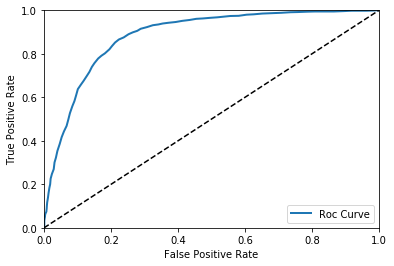

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def plot_roc_curve(fpr, tpr, label ="Random Forest"):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

fpr, tpr, thresholds2 = roc_curve(y_train_black_measles, 
                                                      y_scores_forest)
plot_roc_curve(fpr, tpr, "Roc Curve")

plt.legend(loc="lower right")

plt.show()


In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_black_measles, y_scores_forest)
# 0.9624496555967156

0.88424032877967

In [56]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_black_measles,
                                                         y_scores_forest)


In [57]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

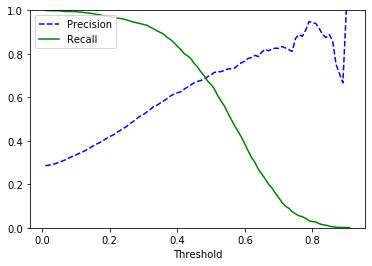

In [58]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

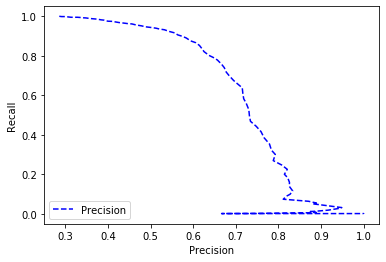

In [60]:
plt.plot(precisions, recalls, "b--", label="Precision")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="lower left")
plt.show()


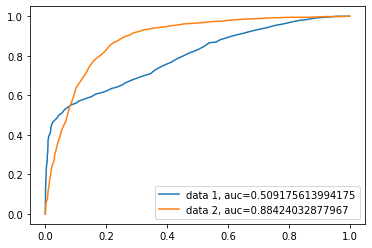

In [33]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
# fpr, tpr, thresh = metrics.roc_curve(label, pred)
fpr2, tpr2, thresholds2 = roc_curve(y_train_black_rot, 
                                                      y_scores_forest2)
auc = roc_auc_score(y_train_black_rot, y_scores_forest)
plt.plot(fpr2,tpr2,label="data 1, auc="+str(auc))


# fpr, tpr, thresh = metrics.roc_curve(label, pred)
fpr, tpr, thresholds = roc_curve(y_train_black_measles,y_scores_forest)


# fpr3, tpr3, thresholds3 = roc_curve(y_train_leaf_blight, 
#                                                       y_scores_forest3)
# fpr4, tpr4, thresholds4 = roc_curve(y_train_healthy, 
#                                                       y_scores_forest4)
auc = roc_auc_score(y_train_black_measles, y_scores_forest)

plt.plot(fpr,tpr,label="data 2, auc="+str(auc))

plt.legend(loc="lower right")